In [1]:
import sys
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, display # NOTE: will require ffmpeg installation
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import rioxarray
from shapely.geometry import mapping
import seaborn as sns
from xarrayutils.utils import linear_trend, xr_linregress
from eofs.xarray import Eof
from mpl_toolkits.axes_grid1 import AxesGrid

In [2]:
# Define project repo path
inDirName = '/Users/smurugan9/research/aislens/aislens_emulation/'

# Data file paths
regriddedFluxSSH_filepath = 'data/interim/RegriddedFluxSSH.nc' # Data containing regridded flux and SSH for 150 years
iceShelvesShape_filepath = 'data/interim/iceShelves.geojson' # File contains all defined ice shelves
figures_folderpath = 'reports/figures/' # Folder for output figures

#W_Ross_1_filepath = 'data/interim/region.geojson'

interim_data_folder = 'data/interim/'
flux_dedrafted_data_path = 'dedrafted_flux_IMBIE/'

In [6]:
data = xr.open_dataset(inDirName + regriddedFluxSSH_filepath)
flux = data.timeMonthly_avg_landIceFreshwaterFlux
ssh = data.timeMonthly_avg_ssh
lat = data.lat
lon = data.lon

In [ ]:
icems

In [3]:
# Read geoJSON region feature file as GeoDataFrame
iceshelvesmask = gpd.read_file(inDirName + iceShelvesShape_filepath)
# Convert to south polar stereographic projection
icems = iceshelvesmask.to_crs({'init': 'epsg:3031'});
crs = ccrs.SouthPolarStereo();
# Specify projection for data file
data.rio.write_crs("epsg:3031",inplace=True);
# Specify projection for data file flux array
flux.rio.write_crs("epsg:3031",inplace=True);

/Users/smurugan9/opt/anaconda3/envs/aislens/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


NameError: name 'data' is not defined

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(icems.name)

In [ ]:
for i in range(30,33):
    print('extracting data for catchment {}'.format(icems.name.values[i]))
    ds = data.rio.clip(icems.loc[[i],'geometry'].apply(mapping),icems.crs,drop=False)
    flx = ds.timeMonthly_avg_landIceFreshwaterFlux
    flx_mean = flx.mean('time')
    h = ds.timeMonthly_avg_ssh
    h_mean = h.mean('time')
    # Dedraft: Linear Regression with SSH over chosen basin
    print('calculating linear regression for catchment {}'.format(icems.name.values[i]))
    flx_rgrs = xr_linregress(h, flx_mean, dim='time') # h = independent variable
    flx_prd = flx_rgrs.slope*h_mean + flx_rgrs.intercept
    flx_ddrft = flx - flx_prd
    flx_ddrft.to_netcdf(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[i]))
    print('{} file saved'.format(icems.name.values[i]))

In [ ]:
IMBIE1_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[6]))
IMBIE2_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[7]))
IMBIE3_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[8]))
IMBIE4_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[9]))
IMBIE5_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[10]))
IMBIE6_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[11]))
IMBIE7_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[12]))
IMBIE8_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[13]))
IMBIE9_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[14]))
IMBIE10_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[15]))
IMBIE11_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[16]))
IMBIE12_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[17]))
IMBIE13_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[18]))
IMBIE14_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[19]))
IMBIE15_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[20]))
IMBIE16_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[21]))
IMBIE17_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[22]))
IMBIE18_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[23]))
IMBIE19_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[24]))
IMBIE20_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[25]))
IMBIE21_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[26]))
IMBIE22_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[27]))
IMBIE23_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[28]))
IMBIE24_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[29]))
IMBIE25_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[30]))
IMBIE26_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[31]))
IMBIE27_dedrafted = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'{}_dedrafted.nc'.format(icems.name.values[32]))

In [ ]:
IMBIE_dedrafted_total_1_9 = xr.merge([IMBIE1_dedrafted,
                                  IMBIE2_dedrafted,
                                  IMBIE3_dedrafted,
                                  IMBIE4_dedrafted,
                                  IMBIE5_dedrafted,
                                  IMBIE6_dedrafted,
                                  IMBIE7_dedrafted,
                                  IMBIE8_dedrafted,
                                  IMBIE9_dedrafted], compat='no_conflicts')

In [ ]:
IMBIE_dedrafted_total_1_9.to_netcdf(inDirName+interim_data_folder+flux_dedrafted_data_path+'IMBIE_dedrafted_total_1_9_dedrafted.nc')

In [ ]:
IMBIE_dedrafted_total_10_18 = xr.merge([IMBIE10_dedrafted,
                                  IMBIE11_dedrafted,
                                  IMBIE12_dedrafted,
                                  IMBIE13_dedrafted,
                                  IMBIE14_dedrafted,
                                  IMBIE15_dedrafted,
                                  IMBIE16_dedrafted,
                                  IMBIE17_dedrafted,
                                  IMBIE18_dedrafted], compat='no_conflicts')

In [ ]:
IMBIE_dedrafted_total_10_18.to_netcdf(inDirName+interim_data_folder+flux_dedrafted_data_path+'IMBIE_dedrafted_total_10_18_dedrafted.nc')

In [ ]:
IMBIE_dedrafted_total_19_27 = xr.merge([IMBIE19_dedrafted,
                                  IMBIE20_dedrafted,
                                  IMBIE21_dedrafted,
                                  IMBIE22_dedrafted,
                                  IMBIE23_dedrafted,
                                  IMBIE24_dedrafted,
                                  IMBIE25_dedrafted,
                                  IMBIE26_dedrafted,
                                  IMBIE27_dedrafted], compat='no_conflicts')

In [ ]:
IMBIE_dedrafted_total_19_27.to_netcdf(inDirName+interim_data_folder+flux_dedrafted_data_path+'IMBIE_dedrafted_total_19_27_dedrafted.nc')

In [ ]:
IMBIE_dedrafted_total_1_9 = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'IMBIE_dedrafted_total_1_9_dedrafted.nc')
IMBIE_dedrafted_total_10_18 = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'IMBIE_dedrafted_total_10_18_dedrafted.nc')
IMBIE_dedrafted_total_19_27 = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'IMBIE_dedrafted_total_19_27_dedrafted.nc')

In [ ]:
IMBIE_dedrafted_total = xr.merge([IMBIE_dedrafted_total_1_9,
                                  IMBIE_dedrafted_total_10_18,
                                  IMBIE_dedrafted_total_19_27], compat='no_conflicts')

In [ ]:
IMBIE_dedrafted_total.to_netcdf(inDirName+interim_data_folder+flux_dedrafted_data_path+'IMBIE_dedrafted_total.nc')

In [4]:
IMBIE_dedrafted_total = xr.open_dataset(inDirName+interim_data_folder+flux_dedrafted_data_path+'IMBIE_dedrafted_total.nc')

In [7]:
flux_dedraft = IMBIE_dedrafted_total.__xarray_dataarray_variable__
h = ssh

In [ ]:
icems.name.values[4]

In [ ]:
for i in range(6,33):
    #print('extracting data for catchment {}'.format(icems.name.values[i]))
    print(icems.name.values[i])
    print(i)

In [ ]:
basin = 104
basinName = icems.name.values[basin]
ds = data.rio.clip(icems.loc[[basin],'geometry'].apply(mapping),icems.crs,drop=False)
# icems.geometry[104].geoms[3]

In [ ]:
flx = ds.timeMonthly_avg_landIceFreshwaterFlux
h = ds.timeMonthly_avg_ssh

<GeoAxesSubplot:>

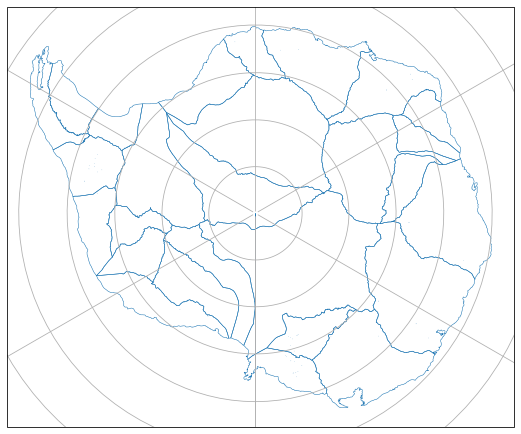

In [9]:
plt.figure(figsize=(20,8))
ax1 = plt.subplot(121,projection=ccrs.SouthPolarStereo())
ax1.gridlines()
icems[6:33].boundary.plot(ax=ax1,linewidth=0.5)
#wross2.plot(ax=ax1)
#wross1.plot(ax=ax1)
#icems.geometry[104].plot(ax=ax1)

In [ ]:
plt.figure(figsize=(20,8))
ax1 = plt.subplot(121,projection=ccrs.SouthPolarStereo())
ax1.gridlines()
icems[34:133].boundary.plot(ax=ax1,linewidth=0.5)
wross1.plot(ax=ax1)

In [ ]:
flxn = flx.dropna('time',how='all')
flxn = flxn.dropna('y',how='all')
flxn = flxn.dropna('x',how='all')

hn = h.dropna('time',how='all')
hn = hn.dropna('y',how='all')
hn = hn.dropna('x',how='all')

In [ ]:
##==================================================
##==============ANIMATION===========================
##==================================================
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))

#ax.set(xlim=(-3, 3), ylim=(-1, 1))
scat = ax.scatter(flx[0,:,:], h[0,:,:])
 
def animate(i):
    scat.set_offsets(np.c_[flx[i,:,:].values.flatten(), h[i,:,:].values.flatten()])
    ax.set_title("time = " + str(flxn.coords['time'].values[i])[:7])

anim = animation.FuncAnimation(fig, animate, interval=100, frames=500)

In [ ]:
# View animation in browser / save to file
HTML(anim.to_jshtml())
# ani.save(inDirName+figures_folderpath+'AIS_flux.mp4')

In [ ]:
%%time
# Dedraft: Linear Regression with SSH over chosen basin
flux_regress = xr_linregress(hn, flxn.mean('time'),dim='time') # h = independent variable
flux_pred = flux_regress.slope*ssh.mean('time') + flux_regress.intercept
flux_dedraft = flxn - flux_pred

In [ ]:
# Plot catchments used
# Are these the best catchment definitions for this dataset? 
# Catchments to be defined so that the melt-rate depth relationship is well established

plt.figure(figsize=(20,8))
ax1 = plt.subplot(121,projection=ccrs.SouthPolarStereo())
ax1.gridlines()
icems[34:133].boundary.plot(ax=ax1,linewidth=0.5)
ax1.coastlines(resolution='10m', zorder=6,linewidth=0.75)

In [ ]:
############################## DEDRAFT ##############################
# To be done on a catchment-by-catchment basis, i.e., in a way such that the 
# meltrate-depth relationship is well constructed

In [ ]:
%%time
# Dedraft: Linear Regression with SSH
flux_regress = xr_linregress(ssh, flux.mean('time'),dim='time') # h = independent variable
flux_pred = flux_regress.slope*ssh.mean('time') + flux_regress.intercept
flux_dedraft = flux - flux_pred

In [10]:
# Deseasonalize
# Remove climatologies to isolate anomalies / deseasonalize 
flux_month = flux_dedraft.groupby("time.month")
flux_clm = flux_month.mean("time") # Climatologies
flux_anm = flux_month - flux_clm # Deseasonalized anomalies

In [ ]:
# Linear trend, if any
def detrend_dim(data, dim, deg):
    # detrend along a single dimension
    p = data.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(data[dim], p.polyfit_coefficients)
    return data - fit

In [ ]:
%%time
# Remove linear trend from the deseasonalized anomalies
flux_clean = detrend_dim(flux_anm, 'time', 1)

In [11]:
%%time
# Time series of intermediate preprocessing results above for plotting
#flux_orig_series = flux.sum(['y','x'])
#flux_pred_series = flux_pred.sum(['y','x'])
flux_dedraft_series = flux_dedraft.sum(['y','x'])
flux_anm_series = flux_anm.sum(['y','x'])
#flux_clean_series = flux_clean.sum(['y','x'])
#flux_seasonal_series = flux_dedraft_series - flux_anm_series
#flux_linear_trend_series = flux_anm_series - flux_clean_series

CPU times: user 4.95 s, sys: 15.2 s, total: 20.2 s
Wall time: 27.1 s


In [ ]:
flux_seasonal_series = flux_dedraft_series - flux_anm_series

NameError: name 'flux_seasonal_series' is not defined

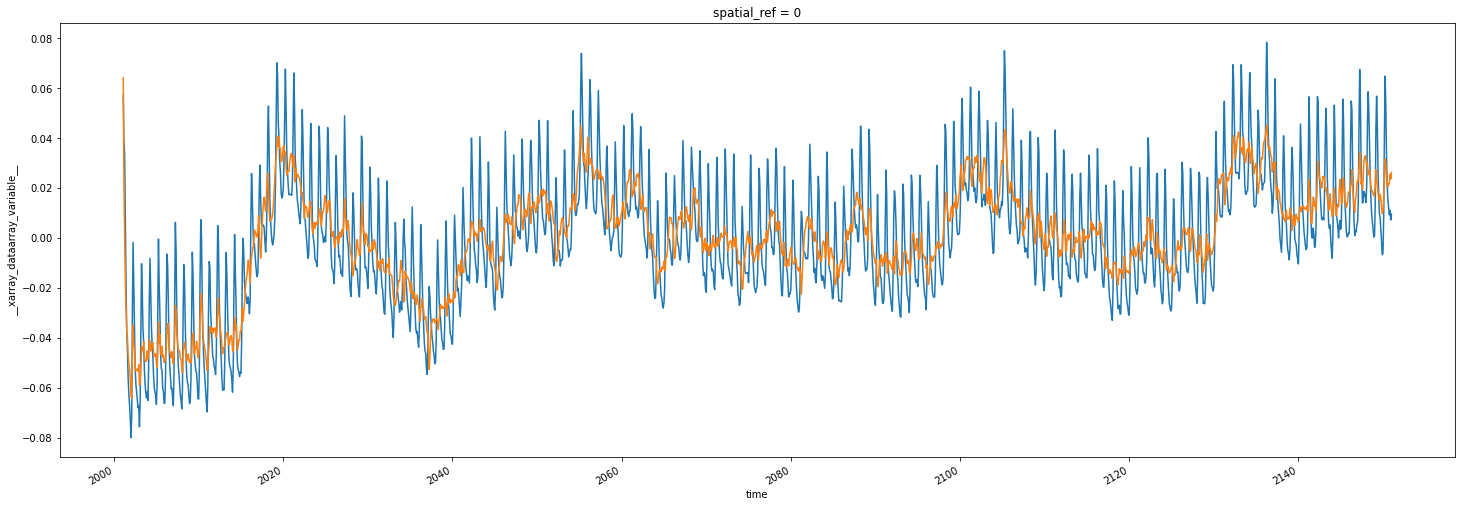

In [12]:
# Plot time series
plt.figure(figsize=(25,8))
#flux_orig_series.plot()
flux_dedraft_series.plot()
flux_anm_series.plot()
flux_seasonal_series.plot()
#flux_linear_trend_series.plot()
#flux_clean_series.plot()

In [ ]:
plt.figure(figsize=(25,8))
flux_orig_series.plot()
flux_reconstr_series = flux_anm_series+flux_seasonal_series+flux_pred.sum(['y','x'])
flux_reconstr_series.plot()

In [ ]:
# Seasonal and Linear Trend Decomposition

plt.subplots(3, figsize=(30, 18), dpi=80)
plt.suptitle('Seasonal and Linear Trend Decomposition')

plt.subplot(311)
flux_anm_series.plot(color='k', linewidth=2)
plt.title('Deseasonalized and Detrended Data')

plt.subplot(312)
flux_linear_trend_series.plot(color='r', linestyle='--', linewidth=0.95)
plt.ylabel('Linear Trend')
plt.title('')

plt.subplot(313)
flux_seasonal_series.plot(color='m', linestyle='dotted', linewidth=0.95)
plt.ylabel('Seasonal Cycle')
plt.title('')

In [13]:
# Convert to numpy array for use in Eof.standard interface
# Can be removed once bug in Eof.xarray interface is fixed
spinup_period_years = 20 # Check with LANL team on period of datapoints to be removed before PCA
spinup_time_period = 12*spinup_period_years

# Cut off initial 'model spinup period' data before analysis
#flux_clean_array = flux_clean[spinup_time_period:].to_numpy()

#flux_clean = flux_clean[spinup_time_period:]
flux_clean = flux_anm[spinup_time_period:]

In [14]:
%%time
# EOF/PCA analysis
# fluxsolver = Eof(flux_clean_array) # using eof.standard numpy interface
fluxsolver = Eof(flux_clean) # using eof.xarray interface

CPU times: user 2min 38s, sys: 1min 2s, total: 3min 41s
Wall time: 1min 10s


In [15]:
# Define EOFs and PCs
fluxeofs = fluxsolver.eofs()
fluxpcs = fluxsolver.pcs()

In [ ]:
reconstr = fluxpcs*fluxeofs

In [16]:
# Eigenvalues of the EOF analysis
# QUESTION: Are these the same as 'weights'?
fluxeigs = fluxsolver.eigenvalues()
fluxeigs_frac = fluxeigs*100/sum(fluxeigs) # Percentage of variability explained by each mode

In [ ]:
plt.plot(fluxeigs_frac[0:10],'*')

In [22]:
sum(fluxeigs_frac[0:5])

<xarray.DataArray 'eigenvalues' ()>
array(70.0897444)
Coordinates:
    mode     int64 4

In [23]:
reconstr0 = fluxeigs[0]*fluxpcs[:,0]*fluxeofs[0,:,:]
reconstr1 = fluxeigs[1]*fluxpcs[:,1]*fluxeofs[1,:,:]
reconstr2 = fluxeigs[2]*fluxpcs[:,2]*fluxeofs[2,:,:]
reconstr3 = fluxeigs[3]*fluxpcs[:,3]*fluxeofs[3,:,:]
reconstr4 = fluxeigs[4]*fluxpcs[:,4]*fluxeofs[4,:,:]

In [24]:
reconstr = reconstr0 + reconstr1 + reconstr2 + reconstr3 + reconstr4

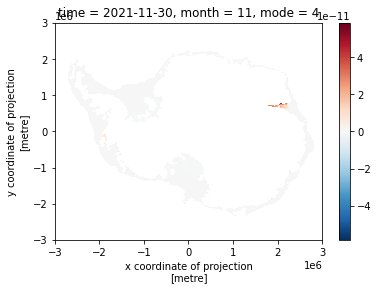

In [27]:
reconstr[10].plot()

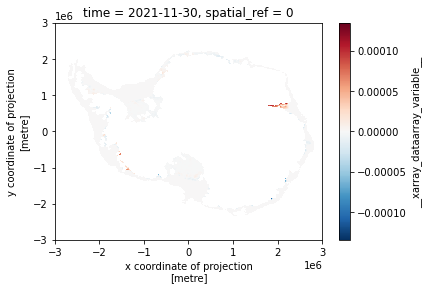

In [29]:
flux_dedraft[250].plot()

In [ ]:
# Save fluxeofs and fluxpcs to interim data files

fluxeofs.to_netcdf(inDirName+interim_data_folder+'fluxeofs.nc')
fluxpcs.to_netcdf(inDirName+interim_data_folder+'fluxpcs.nc')

In [ ]:
# Convert back to Xarray DataArray
# Can be removed once bug in Eof.xarray interface is fixed

# Solved here: https://github.com/ajdawson/eofs/issues/123 (xarray interface)
# fluxeofs = xr.DataArray(fluxeofs, coords=flux_clean[spinup_time_period:].coords, attrs=flux_clean[spinup_time_period:].attrs) # dims=flux_clean[spinup_time_period:].dims
# fluxpcs = xr.DataArray(fluxpcs, dims=['time','mode'], attrs=flux_clean[spinup_time_period:].attrs)

In [31]:
# Define masks for each major region
# Antarctic Peninsula = ap
# West Antarctica = wa
# East Antarctica = ea

ap = 3 
wa = 4
ea = 5

apName = icems.name.values[ap]
waName = icems.name.values[wa]
eaName = icems.name.values[ea]

In [32]:
fluxeofs.rio.write_crs("epsg:3031",inplace=True);

ap_fluxeofs = fluxeofs.rio.clip(icems.loc[[ap],'geometry'].apply(mapping),icems.crs,drop=False)
wa_fluxeofs = fluxeofs.rio.clip(icems.loc[[wa],'geometry'].apply(mapping),icems.crs,drop=False)
ea_fluxeofs = fluxeofs.rio.clip(icems.loc[[ea],'geometry'].apply(mapping),icems.crs,drop=False)

In [ ]:
ap_fluxeofs_std = ap_fluxeofs.std('mode') # 'time' if using standard eofs interface with incorrect dimension
wa_fluxeofs_std = wa_fluxeofs.std('mode') # 'time' if using standard eofs interface with incorrect dimension
ea_fluxeofs_std = ea_fluxeofs.std('mode') # 'time' if using standard eofs interface with incorrect dimension

In [ ]:
plt.figure(figsize=(25,8))
plt.subplot(111,projection=ccrs.SouthPolarStereo())
#ax.coastlines(resolution='110m', zorder=6,linewidth=0.75)
plt.pcolormesh(ap_fluxeofs_std) #vmin=, vmax=
plt.pcolormesh(wa_fluxeofs_std)
plt.pcolormesh(ea_fluxeofs_std)
plt.colorbar()
plt.title('Temporal Std. Deviation of EOF modes')

In [34]:
ap_fluxeofsn = ap_fluxeofs.dropna('mode',how='all')
ap_fluxeofsn = ap_fluxeofsn.dropna('y',how='all')
ap_fluxeofsn = ap_fluxeofsn.dropna('x',how='all')

In [35]:
wa_fluxeofsn = wa_fluxeofs.dropna('mode',how='all')
wa_fluxeofsn = wa_fluxeofsn.dropna('y',how='all')
wa_fluxeofsn = wa_fluxeofsn.dropna('x',how='all')

In [36]:
ea_fluxeofsn = ea_fluxeofs.dropna('mode',how='all')
ea_fluxeofsn = ea_fluxeofsn.dropna('y',how='all')
ea_fluxeofsn = ea_fluxeofsn.dropna('x',how='all')

In [33]:
plt.figure(figsize=(20,10))

mode_number = 1

apvmin = np.nanmin(ap_fluxeofsn[mode_number])
wavmin = np.nanmin(wa_fluxeofsn[mode_number])
eavmin = np.nanmin(ea_fluxeofsn[mode_number])
vmin_global = np.nanmin([apvmin,wavmin,eavmin])

apvmax = np.nanmax(ap_fluxeofsn[mode_number])
wavmax = np.nanmax(wa_fluxeofsn[mode_number])
eavmax = np.nanmax(ea_fluxeofsn[mode_number])
vmax_global = np.nanmax([apvmax,wavmax,eavmax])


vmin_global = vmin_global/2
vmax_global = vmax_global/2


plt.subplot(131,projection=ccrs.SouthPolarStereo())
plt.pcolormesh(ap_fluxeofsn[mode_number],vmin=vmin_global,vmax=vmax_global, cmap='Spectral')
plt.colorbar(orientation='horizontal')
plt.title('Ant. Peninsula EOF Mode: {:.1f}'.format(mode_number))

plt.subplot(132,projection=ccrs.SouthPolarStereo())
plt.pcolormesh(wa_fluxeofsn[mode_number],vmin=vmin_global,vmax=vmax_global, cmap='Spectral')
plt.colorbar(orientation='horizontal')
plt.title('West Ant. EOF Mode: {:.1f}'.format(mode_number))

plt.subplot(133,projection=ccrs.SouthPolarStereo())
plt.pcolormesh(ea_fluxeofsn[mode_number],vmin=vmin_global,vmax=vmax_global, cmap='Spectral')
plt.colorbar(orientation='horizontal')
plt.title('East Ant. EOF Mode: {:.1f}'.format(mode_number))

plt.figure(figsize=(25,8), dpi=80)

y0= 0 # Year at start of time series visualization
yf= 200 # Year at end of time series visualization

t0= 12*y0
tf= 12*yf

plt.plot(fluxpcs[t0:tf,0:mode_number],color='b',linewidth=0.25)
plt.plot(fluxpcs[t0:tf,mode_number],label='Selected PC {:.1f}'.format(mode_number),color='k',linewidth=1)
plt.title('Principal Component Time Series for Mode {:.1f}'.format(mode_number))

#plt.plot(fluxpcs[t0:tf,mode_number],label='Antarctic Peninsula',color='b',linewidth=0.5)
#plt.plot(fluxpcs[t0:tf,mode_number],label='West Antarctica',color='k',linewidth=0.5)
#plt.plot(fluxpcs[t0:tf,mode_number],label='East Antarctica',color='r',linewidth=0.5)
plt.legend()

NameError: name 'ap_fluxeofsn' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Plot phase randomized data
plt.figure(figsize=(25, 8), dpi=80)

# spinuptime not required as data has been cut off before performing the EOF/PC decomposition. 
# Set spinuptime = 0
spinuptime = 0 # Ignore first few years of data in the phase randomization 
n_realizations = 50 # Number of random Fourier realizations

mode_index = 1 # Choose principal component to randomize. interates in range(fluxpcs.mode.values.size)

t_length = fluxpcs[spinuptime:,mode_index].size

new_fl = np.empty((n_realizations,fluxpcs[spinuptime:,mode_index].size)) # fluxpcs[:,i] when using PCA outputs

# Time limits for plotting
t1 = 0
tf = int(t_length/2)

for i in range(n_realizations):    
    fl = fluxpcs[spinuptime:,mode_index] # fluxpcs[:,i] when using PCA outputs
    fl_fourier = np.fft.rfft(fl)
    random_phases = np.exp(np.random.uniform(0,2*np.pi,int(len(fl)/2+1))*1.0j)
    fl_fourier_new = fl_fourier*random_phases
    new_fl[i,:] = np.fft.irfft(fl_fourier_new)
    plt.plot(new_fl[i,t1:tf],'b', linewidth=0.15)
    
# new_fl = xr.DataArray(new_fl, coords=fluxpcs.coords, dims = fluxpcs.dims, attrs=fluxpcs.attrs)

plt.plot(new_fl[45,t1:tf],'b', linewidth=1, label='Randomized Output')
plt.plot(new_fl[10,t1:tf],'b', linewidth=1)
plt.plot(new_fl[40,t1:tf],'b', linewidth=1)
plt.plot(fl[t1:tf],'k', linewidth=3, label='MPAS Output')
plt.title('Deseasonalized and Detrended Flux (Years: {:.1f} - {:.1f})'.format((spinuptime+t1)/12,(spinuptime+tf)/12))
plt.ylabel('landIceFreshwaterFlux')
plt.legend()

In [ ]:
# Plot phase randomized data
plt.figure(figsize=(25, 8), dpi=80)

# spinuptime not required as data has been cut off before performing the EOF/PC decomposition. 
# Set spinuptime = 0
spinuptime = 0 # Ignore first few years of data in the phase randomization 
n_realizations = 50 # Number of random Fourier realizations

mode_index = 1 # Choose principal component to randomize. interates in range(fluxpcs.mode.values.size)

t_length = fluxpcs[spinuptime:,mode_index].size
new_fl = np.empty((t_length,n_realizations,t_length)) # fluxpcs[:,i] when using PCA outputs

for index in range(t_length):
    # Time limits for plotting
    t1 = 0
    tf = int(t_length/1)

    for i in range(n_realizations):    
        fl = fluxpcs[spinuptime:,index] # fluxpcs[:,i] when using PCA outputs
        fl_fourier = np.fft.rfft(fl)
        random_phases = np.exp(np.random.uniform(0,2*np.pi,int(len(fl)/2+1))*1.0j)
        fl_fourier_new = fl_fourier*random_phases
        new_fl[i,:] = np.fft.irfft(fl_fourier_new)
        plt.plot(new_fl[i,t1:tf],'b', linewidth=0.15)

# new_fl = xr.DataArray(new_fl, coords=fluxpcs.coords, dims = fluxpcs.dims, attrs=fluxpcs.attrs)

plt.plot(new_fl[45,t1:tf],'b', linewidth=1, label='Randomized Output')
plt.plot(new_fl[10,t1:tf],'b', linewidth=1)
plt.plot(new_fl[40,t1:tf],'b', linewidth=1)
plt.plot(fl[t1:tf],'k', linewidth=3, label='MPAS Output')
plt.title('Deseasonalized and Detrended Flux (Years: {:.1f} - {:.1f})'.format((spinuptime+t1)/12,(spinuptime+tf)/12))
plt.ylabel('landIceFreshwaterFlux')
plt.legend()

In [ ]:
reconstr_orig = fluxeofs

In [ ]:
data_orig = fluxeigs*fluxeofs

In [ ]:
data_orig = fluxpcs*data_orig